<a href="https://colab.research.google.com/github/bluelikemilk/DL_AdvancedComptuerVision/blob/main/TF2_0_CIFAR_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.7.0


# Load data

In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
# print the size of input and output
print('Input image shape: ', x_train[0].shape)
# normalize input data 
x_train = x_train / 255.0
x_test = x_test / 255.0
# calculate the number of class
K = len(set(y_train[:,0]))
print("Number of class: ", K)

Input image shape:  (32, 32, 3)
Number of class:  10


# Build the model


In [5]:
# model layers
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# compile model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 44s 9ms/step - loss: 1.5574 - accuracy: 0.4300 - val_loss: 1.3421 - val_accuracy: 0.5168
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2666 - accuracy: 0.5463 - val_loss: 1.1350 - val_accuracy: 0.6007
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1329 - accuracy: 0.5943 - val_loss: 1.0499 - val_accuracy: 0.6264
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0389 - accuracy: 0.6299 - val_loss: 0.9948 - val_accuracy: 0.6541
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9683 - accuracy: 0.6539 - val_loss: 0.9106 - val_accuracy: 0.6891
Epoch 6/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8986 - accuracy: 0.6801 - val_loss: 0.8974 - val_accuracy: 0.6888
Epoch 7/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8490 - accuracy: 0.6974 - val_loss: 0.8862 - val_ac

# Plot model accuracy and loss

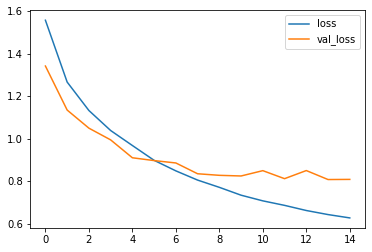

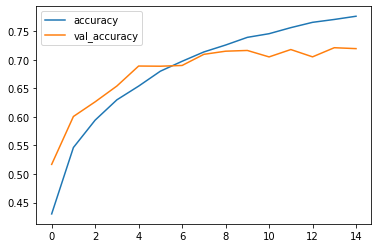

In [9]:
# plot accuracy and loss
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.figure(2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
